In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn

from src import config, datasource
from src import models as notebook_models

sns.set_theme()
%matplotlib inline


/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
settings = config.get_settings()

In [3]:
df_data = datasource.get_data_frame()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23038 entries, 0 to 23037
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     23038 non-null  object
 1   filename  23038 non-null  object
dtypes: object(2)
memory usage: 360.1+ KB


In [4]:
df_data.head()

,class,filename
0,benign,melanoma_2841.jpg
1,benign,melanoma_3384.jpg
2,Vitiligo,Image332.jpeg
3,Eczema,05atopicChild0828061.jpeg
4,malignant,melanoma_5563.jpg


In [5]:
train, val, test = datasource.get_train_validate_test(df_data=df_data)

train_loader = datasource.get_data_loader(train)
val_loader = datasource.get_data_loader(val)
test_loader = datasource.get_data_loader(test)


In [6]:
device = settings.DEVICE
num_classes = 3
num_abcd_features = 5
model = notebook_models.ResNetCosineSwinModel(num_abcd_features=num_abcd_features, num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
py_model = notebook_models.PyTorchModel(model, criterion, optimizer, scheduler)


/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 / 100  - Loss: 2740.3046, Train Acc: 0.8205, Val Acc: 0.541
Epoch 2 / 100  - Loss: 1140.5193, Train Acc: 0.8851, Val Acc: 0.8635
Epoch 3 / 100  - Loss: 751.4814, Train Acc: 0.9079, Val Acc: 0.9306
Epoch 4 / 100  - Loss: 627.74, Train Acc: 0.9148, Val Acc: 0.8775
Epoch 5 / 100  - Loss: 581.9915, Train Acc: 0.9195, Val Acc: 0.9359
Epoch 6 / 100  - Loss: 535.642, Train Acc: 0.9253, Val Acc: 0.9339
Epoch 7 / 100  - Loss: 506.72, Train Acc: 0.9306, Val Acc: 0.9547
Epoch 8 / 100  - Loss: 479.872, Train Acc: 0.9323, Val Acc: 0.9441
Epoch 9 / 100  - Loss: 465.1643, Train Acc: 0.9337, Val Acc: 0.9364
Epoch 10 / 100  - Loss: 449.6908, Train Acc: 0.9367, Val Acc: 0.9518
Epoch 11 / 100  - Loss: 275.9841, Train Acc: 0.9503, Val Acc: 0.9609
Epoch 12 / 100  - Loss: 259.0095, Train Acc: 0.954, Val Acc: 0.9643
Epoch 13 / 100  - Loss: 249.7932, Train Acc: 0.9559, Val Acc: 0.9624
Epoch 14 / 100  - Loss: 240.8798, Train Acc: 0.9578, Val Acc: 0.9619
Epoch 15 / 100  - Loss: 238.2286, Train Acc: 0.95

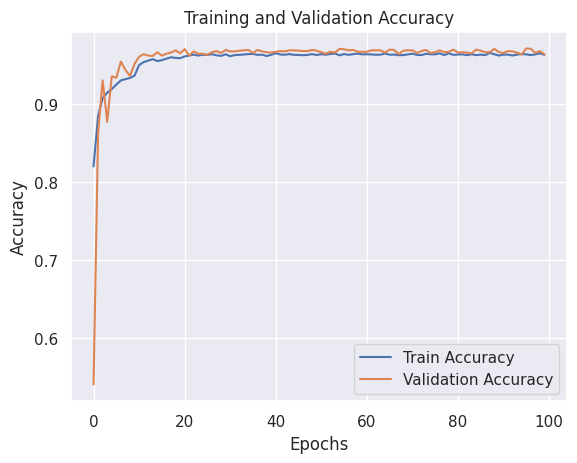

In [7]:
%timeit

epochs = 100
py_model.fit(train_loader, val_loader, epochs)
py_model.plot_training_and_validation_accuracy()
plt.show()


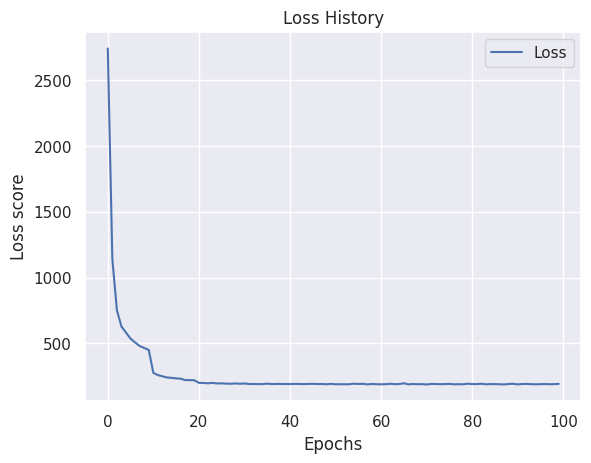

In [8]:
py_model.plot_loss()
plt.show()

In [9]:
torch.save(py_model.model.state_dict(), "./experiments/weights/resnet18_melanoma_with_abcd_swin.pth")
print("✅ Модель сохранена!")

✅ Модель сохранена!


In [10]:
py_model.load_model("./experiments/weights/resnet18_melanoma_with_abcd_swin.pth")

✅ Модель загружена из ./experiments/weights/resnet18_melanoma_with_abcd_swin.pth!


In [11]:
f1 = py_model.evaluate_on_test_f1(test_loader)
print(f"Test F1 Score: {f1:.4f}")


Test F1 Score: 0.9688
